# <u><center>**Book Recommendation System**</center></u>

#Import Library

In [ ]:
!pip install scikit-surprise
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import ast
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVDpp, accuracy
from surprise.model_selection import cross_validate
from collections import defaultdict
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering
import matplotlib
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time
import re
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from keras import layers
from tensorflow import keras
from keras.models import Model
from keras.layers import Embedding, Input, Flatten, Concatenate, Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357249 sha256=f33d121686a88d7275a9dcbd514eea2c2622a3a36a6d3de710dd28303107bf7a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


#Inisialisasi Data

In [ ]:
users = pd.read_csv('https://raw.githubusercontent.com/mujtabaali02/Book-Recommendation-System/master/Users.csv')
books = pd.read_csv('https://raw.githubusercontent.com/Benzzk/NusantaRead/main/books_new.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/mujtabaali02/Book-Recommendation-System/master/Ratings.csv')

In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
users.head(20)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, new york, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
books.head(20)

,ISBN,Book-Title,genre
0,0195153448,Classical Mythology,NaN
1,0002005018,Clara Callan,NaN
2,0060973129,Decision in Normandy,['Fiction']
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction']
4,0393045218,The Mummies of Urumchi,['Fiction']
5,0399135782,The Kitchen God's Wife,['Fiction']
6,0425176428,What If?: The World's Foremost Military Histor...,['Fiction']
7,0671870432,PLEADING GUILTY,NaN
8,0679425608,Under the Black Flag: The Romance and the Real...,['Fiction']
9,074322678X,Where You'll Find Me: And Other Stories,['Fiction']


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ISBN        271360 non-null  object
 1   Book-Title  271360 non-null  object
 2   genre       223476 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [ ]:
ratings.head(20)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#Data Preprocessing & Cleaning

Mendeteksi Missing Value

In [ ]:
#Mencari banyak missing value
null_counts_users = users.isnull().sum()
null_counts_books = books.isnull().sum()
null_counts_ratings = ratings.isnull().sum()

print("Untuk Dataset Users: \n", null_counts_users, '\n')
print("Untuk Dataset Books: \n", null_counts_books, '\n')
print("Untuk Dataset Ratings: \n", null_counts_ratings, '\n')

"""
Diperoleh informasi berikut.
  - Pada dataset 'Users' terdapat 110762 missing value pada kolom 'age'.
  - Pada dataset 'Books' terdapat 2 buah missing value pada kolom 'Book-Author',
    2 buah missing value pada kolom 'Publisher', dan 3 buah missing value pada
    kolom 'Image-URL-L'.
  - Pada dataset 'Ratings' tidak terdapat missing value.
"""

Untuk Dataset Users: 
 User-ID          0
Location         0
Age         110762
dtype: int64 

Untuk Dataset Books: 
 ISBN              0
Book-Title        0
genre         47884
dtype: int64 

Untuk Dataset Ratings: 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 



"\nDiperoleh informasi berikut.\n  - Pada dataset 'Users' terdapat 110762 missing value pada kolom 'age'.\n  - Pada dataset 'Books' terdapat 2 buah missing value pada kolom 'Book-Author',\n    2 buah missing value pada kolom 'Publisher', dan 3 buah missing value pada\n    kolom 'Image-URL-L'.\n  - Pada dataset 'Ratings' tidak terdapat missing value.\n"

In [ ]:
#Mencetak baris dengan missing value untuk dataset users
users_null_rows = users.isnull().any(axis=1)
print('USERS DATASET \n', users[users_null_rows], '\n')

USERS DATASET 
         User-ID                            Location  Age
0             1                  nyc, new york, usa  NaN
2             3     moscow, yukon territory, russia  NaN
4             5  farnborough, hants, united kingdom  NaN
6             7                 washington, dc, usa  NaN
7             8            timmins, ontario, canada  NaN
...         ...                                 ...  ...
278849   278850          sergnano, lombardia, italy  NaN
278853   278854               portland, oregon, usa  NaN
278855   278856           brampton, ontario, canada  NaN
278856   278857           knoxville, tennessee, usa  NaN
278857   278858                dublin, n/a, ireland  NaN

[110762 rows x 3 columns] 



In [ ]:
#Mencetak baris dengan missing value untuk dataset books
books_null_rows = books.isnull().any(axis=1)
print('BOOKS DATASET \n', books[books_null_rows], '\n')

BOOKS DATASET 
               ISBN                                         Book-Title genre
0       0195153448                                Classical Mythology   NaN
1       0002005018                                       Clara Callan   NaN
7       0671870432                                    PLEADING GUILTY   NaN
24      0439095026                       Tell Me This Isn't Happening   NaN
26      0971880107                                        Wild Animus   NaN
...            ...                                                ...   ...
271332  3453065123  Ich war Hitlerjunge Salomon. ( erlebt und erfa...   NaN
271333  3525335423                Das Deutsche Kaiserreich 1871-1918.   NaN
271346  0395264707                                         Dreamsnake   NaN
271353  014002803X                                  Anti Death League   NaN
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   NaN

[47884 rows x 3 columns] 



In [ ]:
#Mencetak baris dengan missing value untuk dataset ratings
ratings_null_rows = ratings.isnull().any(axis=1)
print('RATINGS DATASET \n', ratings[ratings_null_rows], '\n')

RATINGS DATASET 
 Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating]
Index: [] 



Menangani Missing Value

In [ ]:
#Menampilkan statistik dataset users pada kolom age
users['Age'].describe()
#Nilai maksimum pada kolom age cukup tidak wajar

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [ ]:
upper_lim = users['Age'].quantile(.95)
lower_lim = users['Age'].quantile(.05)
users.loc[(users["Age"] > upper_lim),"Age"] = upper_lim
users.loc[(users["Age"] < lower_lim),"Age"] = lower_lim

In [ ]:
users = users.dropna(subset=['Age'])
books = books.dropna(subset=['genre'])

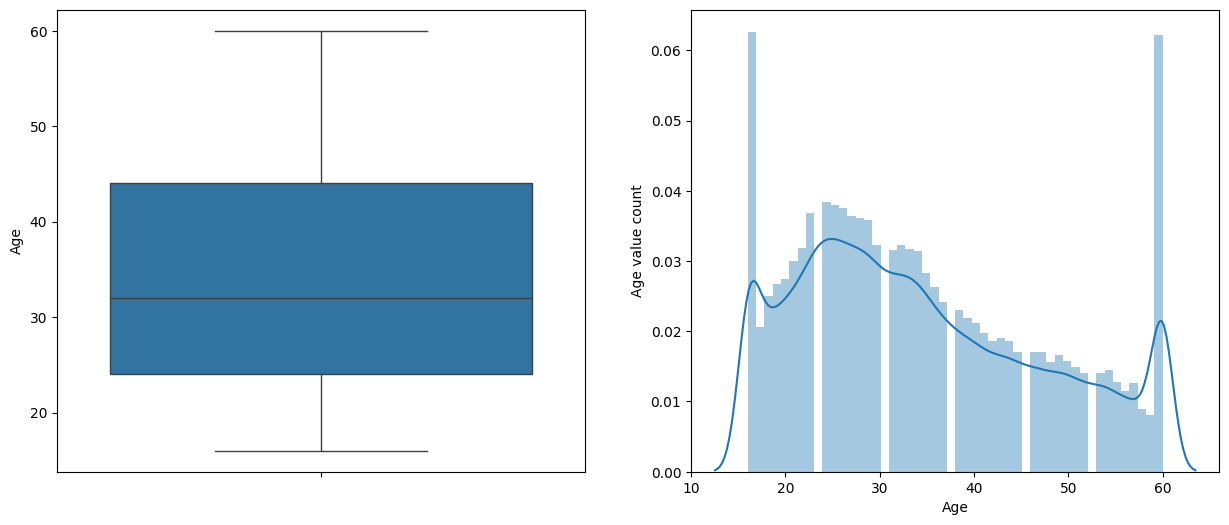

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=users["Age"])
fig.set_title('')
fig.set_ylabel("Age")

plt.subplot(1, 2, 2)
fig = sns.distplot(users["Age"].dropna())
fig.set_ylabel('Age value count')
fig.set_xlabel("Age")

plt.show()

In [ ]:
users['Age'].describe()

count    168096.000000
mean         34.465549
std          12.855669
min          16.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          60.000000
Name: Age, dtype: float64

In [ ]:
users['locat']=users.Location.apply(lambda x: x.split(', '))
users['Country']=users.locat.apply(lambda x: x[2] if len(x)==3 else 'n/a')
users.drop('locat',axis=1,inplace=True)

In [ ]:
users['Country'].value_counts()

Country
usa               76339
spain             12532
united kingdom    12383
canada            11359
germany           10628
                  ...  
heaven                1
la suisse             1
america               1
djibouti              1
hernando              1
Name: count, Length: 378, dtype: int64

In [ ]:
users

,User-ID,Location,Age,Country
1,2,"stockton, new york, usa",18.0,usa
3,4,"porto, v.n.gaia, portugal",17.0,portugal
5,6,"santa monica, california, usa",60.0,usa
9,10,"albacete, wisconsin, spain",26.0,spain
10,11,"melbourne, victoria, australia",16.0,australia
...,...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0,canada
278850,278851,"dallas, texas, usa",33.0,usa
278851,278852,"brisbane, queensland, australia",32.0,australia
278852,278853,"stranraer, n/a, united kingdom",17.0,united kingdom


In [ ]:
books['genre'].unique()

array(["['Fiction']", "['Religion']", "['Human-alien encounters']",
       "['History']", "['Juvenile Fiction']",
       "['Biography & Autobiography']", "['Science']",
       "['Business & Economics']", "['African American authors']",
       "['Juvenile Nonfiction']", "['Mental illness']", "['Pets']",
       "['Cooking']", "['Argentina']", "['Cartoons and comics']",
       "['Detective and mystery stories']", "['Body, Mind & Spirit']",
       "['Social Science']", "['Education']", "['Friendship']",
       "['Comics & Graphic Novels']", "['Art']", "['Environmentalists']",
       "['Good and evil']", "['Gardening']", "['Nature']",
       "['High school teachers']", "['Travel']", "['Games & Activities']",
       "['Health & Fitness']", "['FICTION']", "['Young Adult Fiction']",
       "['Literary Criticism']", '["Children\'s stories, American"]',
       "['Philosophy']", "['Computers']", "['Americans']",
       "['Rock groups']", "['Performing Arts']",
       "['American wit and humor']",

In [ ]:
books['genre'].value_counts()

genre
['Fiction']                      176154
['Juvenile Fiction']              29874
['Biography & Autobiography']      1963
['Religion']                       1719
['Comics & Graphic Novels']        1602
                                  ...  
['Chinese Americans']                 1
['Revolutions']                       1
['Hindu astrology']                   1
['Cooks']                             1
['Afghan Wars']                       1
Name: count, Length: 365, dtype: int64

In [ ]:
label_enc = LabelEncoder()
books['genre_enc'] = label_enc.fit_transform(books['genre'])
books

,ISBN,Book-Title,genre,genre_enc
2,0060973129,Decision in Normandy,['Fiction'],224
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224
4,0393045218,The Mummies of Urumchi,['Fiction'],224
5,0399135782,The Kitchen God's Wife,['Fiction'],224
6,0425176428,What If?: The World's Foremost Military Histor...,['Fiction'],224
...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,['Fiction'],224
271355,0440400988,There's a Bat in Bunk Five,['Fiction'],224
271356,0525447644,From One to One Hundred,['Juvenile Fiction'],270
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,['Fiction'],224


In [ ]:
# Membuat fungsi untuk melihat seberapa banyak missing value
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

In [ ]:
# Mendeteksi null pada dataset users
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(users[show_missing()].isnull().sum().sort_values(ascending = False)/len(users)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [ ]:
# Mendeteksi null pada dataset books
print('Missing Data Count')
print(books[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(books[show_missing()].isnull().sum().sort_values(ascending = False)/len(users)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [ ]:
# Mendeteksi null pada dataset ratings
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [ ]:
users.head(10)

,User-ID,Location,Age,Country
1,2,"stockton, new york, usa",18.0,usa
3,4,"porto, v.n.gaia, portugal",17.0,portugal
5,6,"santa monica, california, usa",60.0,usa
9,10,"albacete, wisconsin, spain",26.0,spain
10,11,"melbourne, victoria, australia",16.0,australia
12,13,"barcelona, barcelona, spain",26.0,spain
17,18,"rio de janeiro, rio de janeiro, brazil",25.0,brazil
18,19,"weston, ,",16.0,n/a
19,20,"langhorne, pennsylvania, usa",19.0,usa
20,21,"ferrol / spain, alabama, spain",46.0,spain


In [ ]:
users.shape

(168096, 4)

In [ ]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
data_users_ratings=pd.merge(users,ratings, on='User-ID')

In [ ]:
merged=pd.merge(books,data_users_ratings, on='ISBN')

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622935 entries, 0 to 622934
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ISBN         622935 non-null  object 
 1   Book-Title   622935 non-null  object 
 2   genre        622935 non-null  object 
 3   genre_enc    622935 non-null  int64  
 4   User-ID      622935 non-null  int64  
 5   Location     622935 non-null  object 
 6   Age          622935 non-null  float64
 7   Country      622935 non-null  object 
 8   Book-Rating  622935 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 42.8+ MB


In [ ]:
merged.head()

,ISBN,Book-Title,genre,genre_enc,User-ID,Location,Age,Country,Book-Rating
0,0060973129,Decision in Normandy,['Fiction'],224,2954,"wichita, kansas, usa",60.0,usa,8
1,0060973129,Decision in Normandy,['Fiction'],224,152827,"ottawa, ontario, canada",40.0,canada,7
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,35704,"kansas city, missouri, usa",53.0,usa,6
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,83160,"oregon city, oregon, usa",60.0,usa,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,110912,"milpitas, california, usa",36.0,usa,10


In [ ]:
# Mendeteksi null pada dataset merged
print('Missing Data Count')
print(merged[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [ ]:
merged = merged[merged['Book-Rating'] != 0]
merged

,ISBN,Book-Title,genre,genre_enc,User-ID,Location,Age,Country,Book-Rating
0,0060973129,Decision in Normandy,['Fiction'],224,2954,"wichita, kansas, usa",60.0,usa,8
1,0060973129,Decision in Normandy,['Fiction'],224,152827,"ottawa, ontario, canada",40.0,canada,7
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,35704,"kansas city, missouri, usa",53.0,usa,6
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,110912,"milpitas, california, usa",36.0,usa,10
6,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,157969,"denver, colorado, usa",30.0,usa,8
...,...,...,...,...,...,...,...,...,...
622919,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",['Fiction'],224,274220,"halle, sachsen-anhalt, germany",28.0,germany,8
622929,1845170423,Cocktail Classics,['Cooking'],155,275970,"pittsburgh, pennsylvania, usa",46.0,usa,7
622930,0449906736,Flashpoints: Promise and Peril in a New World,['Fiction'],224,276313,"livermore, california, usa",36.0,usa,5
622931,0440400988,There's a Bat in Bunk Five,['Fiction'],224,276463,"providence, rhode island, usa",26.0,usa,7


In [ ]:
np.set_printoptions(threshold=10)

In [ ]:
label_encode = LabelEncoder()
merged['User-ID'] = label_enc.fit_transform(merged['User-ID'].astype(str))
merged

,ISBN,Book-Title,genre,genre_enc,User-ID,Location,Age,Country,Book-Rating
0,0060973129,Decision in Normandy,['Fiction'],224,25958,"wichita, kansas, usa",60.0,usa,8
1,0060973129,Decision in Normandy,['Fiction'],224,7641,"ottawa, ontario, canada",40.0,canada,7
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,26883,"kansas city, missouri, usa",53.0,usa,6
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,1546,"milpitas, california, usa",36.0,usa,10
6,0374157065,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,8328,"denver, colorado, usa",30.0,usa,8
...,...,...,...,...,...,...,...,...,...
622919,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",['Fiction'],224,25035,"halle, sachsen-anhalt, germany",28.0,germany,8
622929,1845170423,Cocktail Classics,['Cooking'],155,25296,"pittsburgh, pennsylvania, usa",46.0,usa,7
622930,0449906736,Flashpoints: Promise and Peril in a New World,['Fiction'],224,25357,"livermore, california, usa",36.0,usa,5
622931,0440400988,There's a Bat in Bunk Five,['Fiction'],224,25369,"providence, rhode island, usa",26.0,usa,7


In [ ]:
label_encode2 = LabelEncoder()
merged['ISBN'] = label_enc.fit_transform(merged['ISBN'].astype(str))
merged

,ISBN,Book-Title,genre,genre_enc,User-ID,Location,Age,Country,Book-Rating
0,3239,Decision in Normandy,['Fiction'],224,25958,"wichita, kansas, usa",60.0,usa,8
1,3239,Decision in Normandy,['Fiction'],224,7641,"ottawa, ontario, canada",40.0,canada,7
2,22179,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,26883,"kansas city, missouri, usa",53.0,usa,6
4,22179,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,1546,"milpitas, california, usa",36.0,usa,10
6,22179,Flu: The Story of the Great Influenza Pandemic...,['Fiction'],224,8328,"denver, colorado, usa",30.0,usa,8
...,...,...,...,...,...,...,...,...,...
622919,95466,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",['Fiction'],224,25035,"halle, sachsen-anhalt, germany",28.0,germany,8
622929,86981,Cocktail Classics,['Cooking'],155,25296,"pittsburgh, pennsylvania, usa",46.0,usa,7
622930,36707,Flashpoints: Promise and Peril in a New World,['Fiction'],224,25357,"livermore, california, usa",36.0,usa,5
622931,32930,There's a Bat in Bunk Five,['Fiction'],224,25369,"providence, rhode island, usa",26.0,usa,7


In [ ]:
cols = ['User-ID', 'genre', 'Book-Rating']
merged2 = merged[cols].sort_values(by='User-ID')
merged2.reset_index(drop=True, inplace=True)
merged2

,User-ID,genre,Book-Rating
0,0,['Fiction'],5
1,0,['Fiction'],10
2,0,['Fiction'],10
3,0,['Fiction'],10
4,0,['Fiction'],10
...,...,...,...
223604,36140,['Fiction'],7
223605,36140,['Fiction'],3
223606,36141,['Fiction'],8
223607,36141,['Fiction'],9


In [ ]:
merged2['genre'].unique()

array(["['Fiction']", "['Juvenile Fiction']",
       "['Biography & Autobiography']", ..., "['Dysfunctional families']",
       "['Cocaine industry']", "['Anglicists']"], dtype=object)

##Pembuatan Model

In [ ]:
n_genre = len(merged2['genre'].unique().tolist())
n_users = len(merged2['User-ID'].unique().tolist())

In [ ]:
genre = merged2['genre'].unique().tolist()
print('list genre : ', genre)

genre_to_genre_encoded = {x: i for i, x in enumerate(genre)}
print('encoded genre ke angka: ', genre_to_genre_encoded)

genre_encoded_to_genre = {i: x for i, x in enumerate(genre)}
print('decode angka ke genre : ', genre_encoded_to_genre)

list genre :  ["['Fiction']", "['Juvenile Fiction']", "['Biography & Autobiography']", "['Gardening']", "['Drama']", "['Literary Criticism']", "['Art critics']", "['Travel']", "['Religion']", "['History']", "['India']", "['Comics & Graphic Novels']", "['Detective and mystery stories, American.']", "['Business & Economics']", "['Health & Fitness']", "['Cooking']", "['Juvenile Nonfiction']", "['Black (Fictitious character : Farley)']", "['Education']", "['Computers']", "['Nature']", "['Americans']", "['Games & Activities']", "['Psychology']", "['Virtual reality']", "['Young Adult Fiction']", "['Performing Arts']", "['FICTION']", "['Loggerhead turtle']", "['Detective and mystery stories']", "['Dalgliesh, Adam (Fictitious character)']", "['Human-alien encounters']", "['Science']", "['Humor']", "['Franse fiksie']", "['Empires']", "['Gorilla']", '["Children\'s stories, American"]', '["Hadrian\'s Wall (England)"]', "['Alliances']", "['Architecture']", "['Dystopias']", "['Italian fiction']", "

In [ ]:
new_names = {
    'User-ID': 'user_id',
    'Book-Rating': 'rating'
}

merged2.rename(columns=new_names, inplace=True)

In [ ]:
merged2['genre_enc'] = merged2['genre'].map(genre_to_genre_encoded)
merged2

,user_id,genre,rating,genre_enc
0,0,['Fiction'],5,0
1,0,['Fiction'],10,0
2,0,['Fiction'],10,0
3,0,['Fiction'],10,0
4,0,['Fiction'],10,0
...,...,...,...,...
223604,36140,['Fiction'],7,0
223605,36140,['Fiction'],3,0
223606,36141,['Fiction'],8,0
223607,36141,['Fiction'],9,0


In [ ]:
min_rating = min(merged2['rating'])
max_rating = max(merged2['rating'])

In [ ]:
merged2['rating_norm'] = merged2['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(merged2[['user_id', 'genre_enc']], merged2['rating_norm'], test_size=0.2)

In [ ]:
#Inisialisasi Model

class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_genre, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_genre = num_genre
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.genre_embedding = layers.Embedding(
        num_genre ,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.genre_bias = layers.Embedding(num_genre, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    genre_vector = self.genre_embedding(inputs[:, 1])
    genre_bias = self.genre_bias(inputs[:, 1])
    dot_user_genre = tf.tensordot(user_vector, genre_vector, 2)

    x = dot_user_genre + user_bias + genre_bias

    return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(n_users, n_genre, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Checking val_root_mean_squared_error at end of epoch...")
        if logs['val_root_mean_squared_error'] <= 0.3:
               self.model.stop_training = True

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_test, y_test),
    callbacks = [myCallback()]
)

Epoch 1/100
5591/5591 [==============================] - 33s 5ms/step - loss: 0.5738 - root_mean_squared_error: 0.2010 - val_loss: 0.5854 - val_root_mean_squared_error: 0.2023


In [ ]:
mrg_copy = merged2.copy()
mrg_copy

,user_id,genre,rating,genre_enc,rating_norm
0,0,['Fiction'],5,0,0.444444
1,0,['Fiction'],10,0,1.000000
2,0,['Fiction'],10,0,1.000000
3,0,['Fiction'],10,0,1.000000
4,0,['Fiction'],10,0,1.000000
...,...,...,...,...,...
223604,36140,['Fiction'],7,0,0.666667
223605,36140,['Fiction'],3,0,0.222222
223606,36141,['Fiction'],8,0,0.777778
223607,36141,['Fiction'],9,0,0.888889


In [ ]:
id = mrg_copy.user_id.sample(1).iloc[0]
genre_read_by_user = mrg_copy[mrg_copy.user_id == id]
genre_read_by_user

,user_id,genre,rating,genre_enc,rating_norm
214518,35485,['Fiction'],10,0,1.000000
214519,35485,['Fiction'],7,0,0.666667
214520,35485,['Fiction'],10,0,1.000000
214521,35485,['Juvenile Fiction'],7,1,0.666667
214522,35485,['Fiction'],6,0,0.555556
...,...,...,...,...,...
215042,35485,['Fiction'],8,0,0.777778
215043,35485,['Juvenile Fiction'],9,1,0.888889
215044,35485,['Fiction'],4,0,0.333333
215045,35485,['Fiction'],10,0,1.000000


In [ ]:
genre_not_read = mrg_copy[~mrg_copy['genre_enc'].isin(
    genre_read_by_user.genre_enc.values)]['genre']
genre_not_read = list(
    set(genre_not_read).intersection(set(genre_to_genre_encoded.keys()))
)

In [ ]:
genre_not_read

["['Loggerhead turtle']",
 "['Chambon-sur-Lignon, Le (France)']",
 "['Adventure fiction']",
 "['Department stores']",
 "['English fiction']",
 "['Detective and mystery stories']",
 "['Drug addicts']",
 "['American literature']",
 "['Medical innovations']",
 "['Bildungsromans']",
 "['Industrial management']",
 "['Proofs (Printing)']",
 "['Campers (Persons)']",
 "['Italian fiction']",
 "['Family & Relationships']",
 "['Relationship addiction']",
 "['Comedians']",
 "['Mexican Americans']",
 "['California']",
 "['Deep ecology']",
 "['Suspense fiction, American']",
 "['Justice League of America (Fictitious characters)']",
 "['Fantasy fiction']",
 "['Conduct of life']",
 "['Cognitive therapy']",
 "['Good and evil']",
 "['College readers']",
 "['Book clubs (Discussion groups)']",
 "['Amnesiacs']",
 "['Aeronautics']",
 "['Design']",
 "['Travel']",
 "['Maasai (African people)']",
 "['Developing countries']",
 "['Enlightenment (Buddhism)']",
 "['Austria']",
 "['COMICS & GRAPHIC NOVELS']",
 "['An

In [ ]:
genre_not_read = [
    [genre_to_genre_encoded.get(x)] for x in genre_not_read]
user_genre_array = np.hstack(
    ([[id]] * len(genre_not_read), genre_not_read)
)

In [ ]:
print(user_genre_array)

[[35485    28]
 [35485   210]
 [35485   132]
 ...
 [35485   214]
 [35485   243]
 [35485    59]]


In [ ]:
model.save('Recommender.h5py')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
ratings = model.predict(user_genre_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_genre = [
    genre_encoded_to_genre.get(genre_not_read[x][0]) for x in top_ratings_indices
]
print(recommended_genre)

9/9 [==============================] - 0s 2ms/step
["['Juvenile Nonfiction']", "['Argentina']", "['Detective and mystery stories']", "['Travel']", "['Comic books, strips, etc']"]
